# **Phase 1: Setup and Comprehensive Data Cleaning**

## **Setup and Load Data**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd

# Adjust the path below if your file is in a different location in Google Drive
# For example, if it's in a folder named 'Colab Notebooks', the path might be:
# '/content/gdrive/MyDrive/Colab Notebooks/loan_data.csv'
file_path = '/content/gdrive/MyDrive/loan_data.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Display the first 5 rows of the DataFrame
display(df.head())

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1


Next, let's inspect the DataFrame's structure, including data types and non-null counts, using the `.info()` method.

## **Data Cleaning: Null Values, Duplicates, Missing Values, and Removing Illogical Data**

In [3]:
# Check data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  int64  
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  int64  
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  int64  
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

Finally, we will examine the distribution of our target variable, `loan_status`, to understand the balance between different loan outcomes.

### **Data Cleaning: Duplicate Rows**

In [4]:
# Identify and count duplicate rows
duplicate_rows_count = df.duplicated().sum()
print(f"Number of duplicate rows found: {duplicate_rows_count}")

# Remove duplicate rows
df.drop_duplicates(inplace=True)
print(f"Number of rows after removing duplicates: {df.shape[0]}")

Number of duplicate rows found: 0
Number of rows after removing duplicates: 45000


### **Data Cleaning: Missing Values**

In [5]:
# Check for missing values
missing_values_count = df.isnull().sum()
print("Count of missing values per column:")
display(missing_values_count)

Count of missing values per column:


,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


### **Data Cleaning: Illogical Data (person_emp_exp > person_age)**

In [6]:
# Filter and drop rows where 'person_emp_exp' is greater than 'person_age'
initial_rows = df.shape[0]
df = df[df['person_emp_exp'] <= df['person_age']]
rows_removed_illogical = initial_rows - df.shape[0]
print(f"Number of rows removed due to illogical 'person_emp_exp' > 'person_age': {rows_removed_illogical}")

# Display the final shape of the DataFrame
print(f"Final shape of the DataFrame after all cleaning steps: {df.shape}")

Number of rows removed due to illogical 'person_emp_exp' > 'person_age': 0
Final shape of the DataFrame after all cleaning steps: (45000, 14)


## **Data Preprocessing (Encoding & Split)**

In [7]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded DataFrame and its info to see changes
display(df_encoded.head())
df_encoded.info()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22,71948,0,35000,16.02,0.49,3,561,1,False,...,True,False,False,True,False,False,False,True,False,False
1,21,12282,0,1000,11.14,0.08,2,504,0,False,...,False,False,True,False,True,False,False,False,False,True
2,25,12438,3,5500,12.87,0.44,3,635,1,False,...,False,False,False,False,False,False,True,False,False,False
3,23,79753,0,35000,15.23,0.44,2,675,1,False,...,False,False,False,True,False,False,True,False,False,False
4,24,66135,1,35000,14.27,0.53,4,586,1,True,...,True,False,False,True,False,False,True,False,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   person_age                          45000 non-null  int64  
 1   person_income                       45000 non-null  int64  
 2   person_emp_exp                      45000 non-null  int64  
 3   loan_amnt                           45000 non-null  int64  
 4   loan_int_rate                       45000 non-null  float64
 5   loan_percent_income                 45000 non-null  float64
 6   cb_person_cred_hist_length          45000 non-null  int64  
 7   credit_score                        45000 non-null  int64  
 8   loan_status                         45000 non-null  int64  
 9   person_gender_male                  45000 non-null  bool   
 10  person_education_Bachelor           45000 non-null  bool   
 11  person_education_Doctorate          45000

## **Feature Scaling**

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on X_train and transform both X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames with original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display the mean and standard deviation of X_train_scaled to confirm scaling
print("Mean of X_train_scaled:\n", X_train_scaled.mean())
print("\nStandard Deviation of X_train_scaled:\n", X_train_scaled.std())

Mean of X_train_scaled:
 person_age                           -1.578984e-16
person_income                         7.488895e-17
person_emp_exp                       -4.285813e-18
loan_amnt                            -7.985147e-17
loan_int_rate                        -6.194128e-16
loan_percent_income                   1.380483e-16
cb_person_cred_hist_length           -2.571488e-17
credit_score                          1.037505e-15
person_gender_male                   -1.263187e-17
person_education_Bachelor             3.135411e-17
person_education_Doctorate            4.105358e-17
person_education_High School          2.391033e-17
person_education_Master               9.699472e-18
person_home_ownership_OTHER          -2.300805e-17
person_home_ownership_OWN             6.767074e-18
person_home_ownership_RENT            1.602669e-16
loan_intent_EDUCATION                 4.398598e-18
loan_intent_HOMEIMPROVEMENT          -4.736952e-17
loan_intent_MEDICAL                  -1.759439e-17
loan_i

In [10]:
# Define features (X) and target (y)
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the split datasets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (31500, 22)
Shape of X_test: (13500, 22)
Shape of y_train: (31500,)
Shape of y_test: (13500,)


# **Phase 2: Exploratory Data Analysis (EDA) and Visualization**

## **Key Visualizations**

In [11]:
# Show a count of the target variable 'loan_status'
display(df['loan_status'].value_counts())

,count
loan_status,
0,35000
1,10000


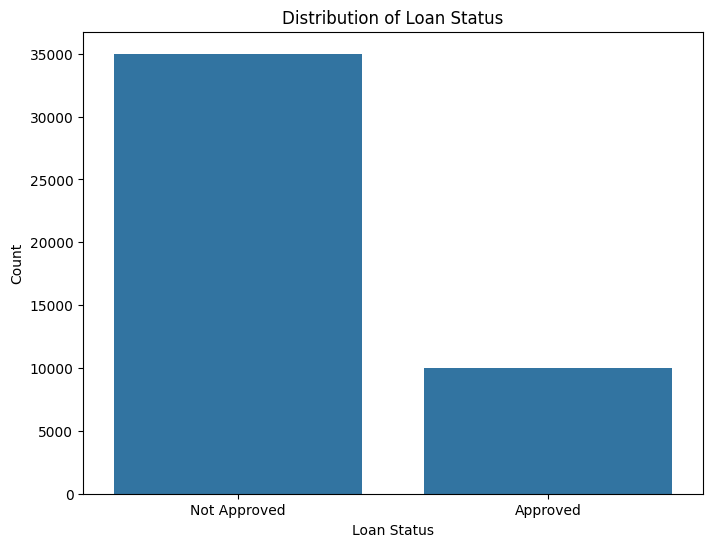

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Countplot of 'loan_status'
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=df_encoded)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Approved', 'Approved'])
plt.savefig('loan_status_distribution.png')
plt.show() # Display the figure

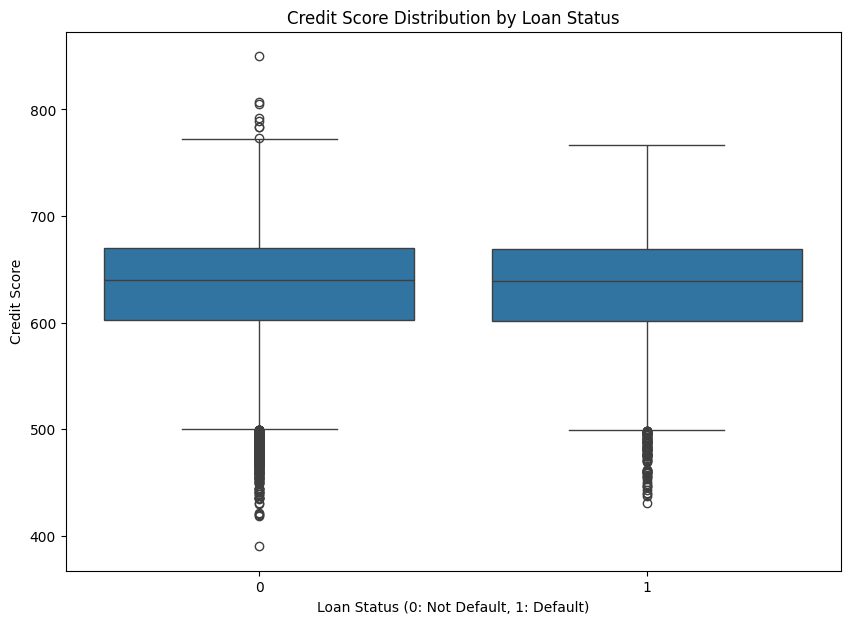

In [13]:
# 2. Boxplot of 'credit_score' grouped by 'loan_status'
plt.figure(figsize=(10, 7))
sns.boxplot(x='loan_status', y='credit_score', data=df_encoded)
plt.title('Credit Score Distribution by Loan Status')
plt.xlabel('Loan Status (0: Not Default, 1: Default)')
plt.ylabel('Credit Score')
plt.savefig('credit_score_by_status.png')
plt.show() # Display the figure

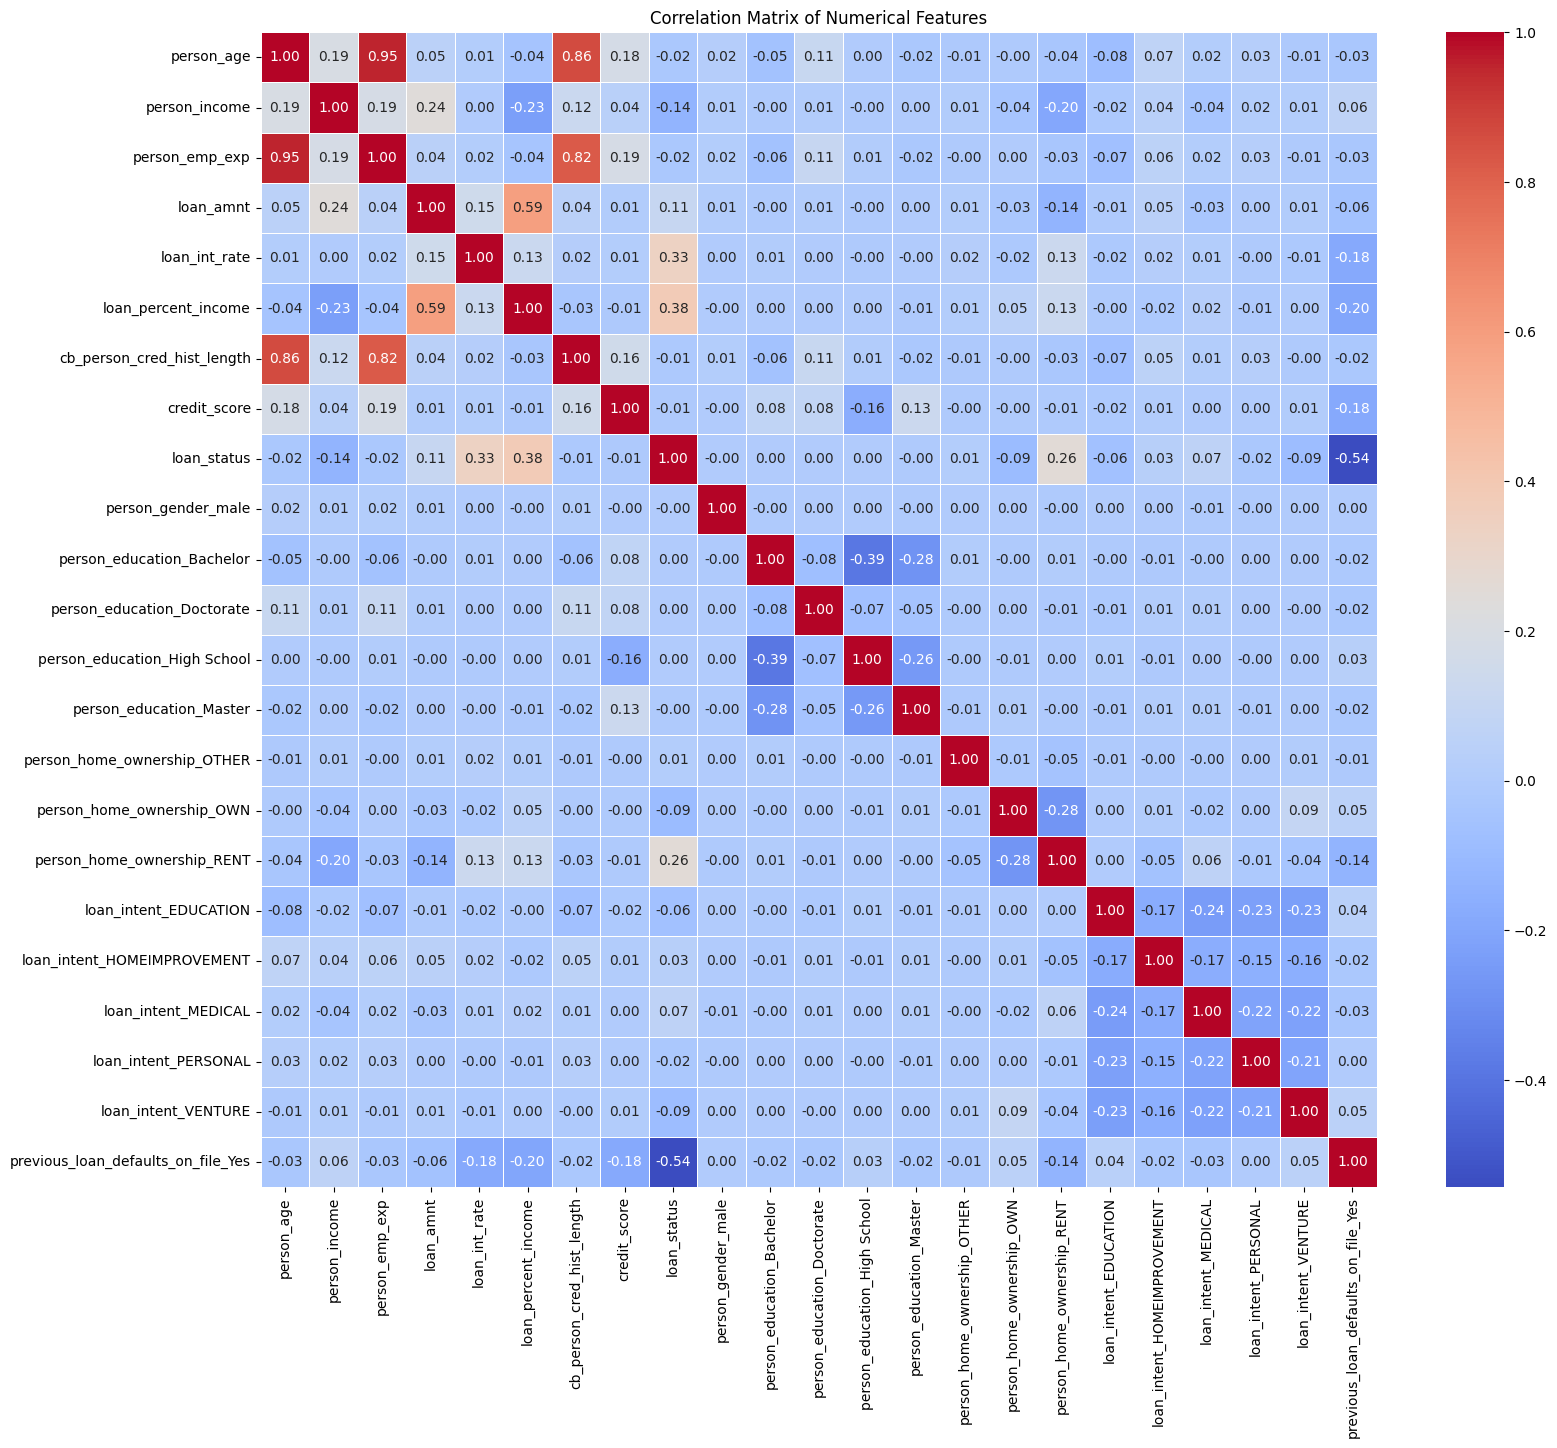

In [14]:
# 3. Heatmap of the correlation matrix for all numerical features

# Select only numerical columns (int, float, and bool for encoded features)
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64', 'bool']).columns
correlation_matrix = df_encoded[numerical_cols].corr()

plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.savefig('correlation_heatmap.png')
plt.show() # Display the figure

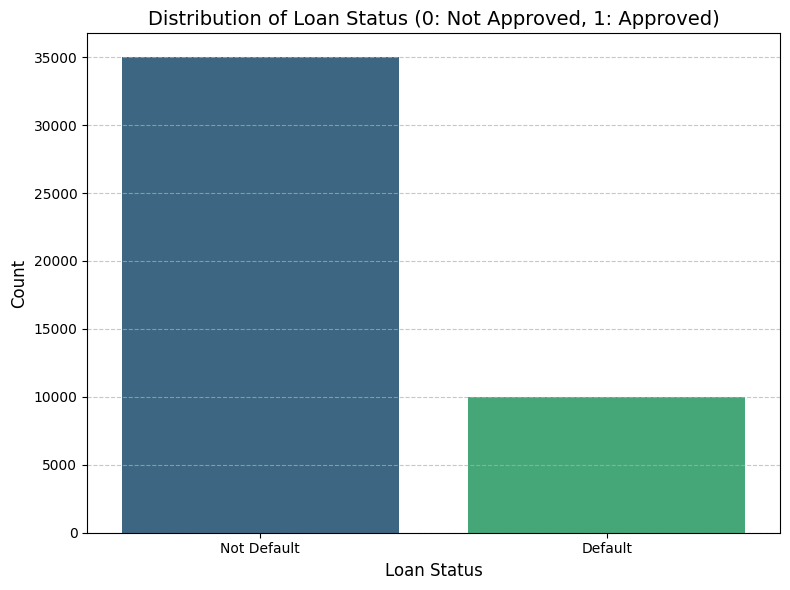

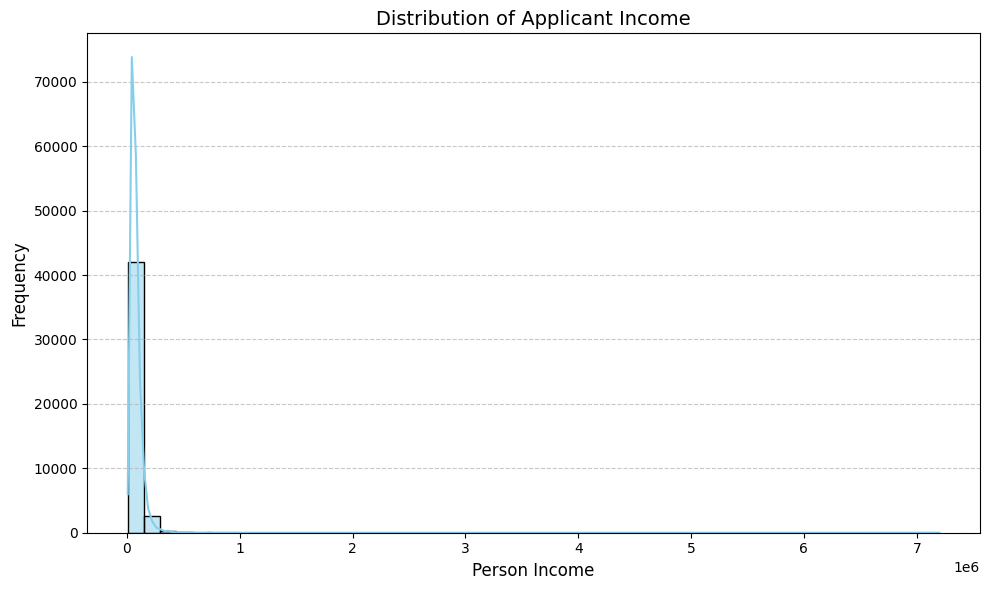

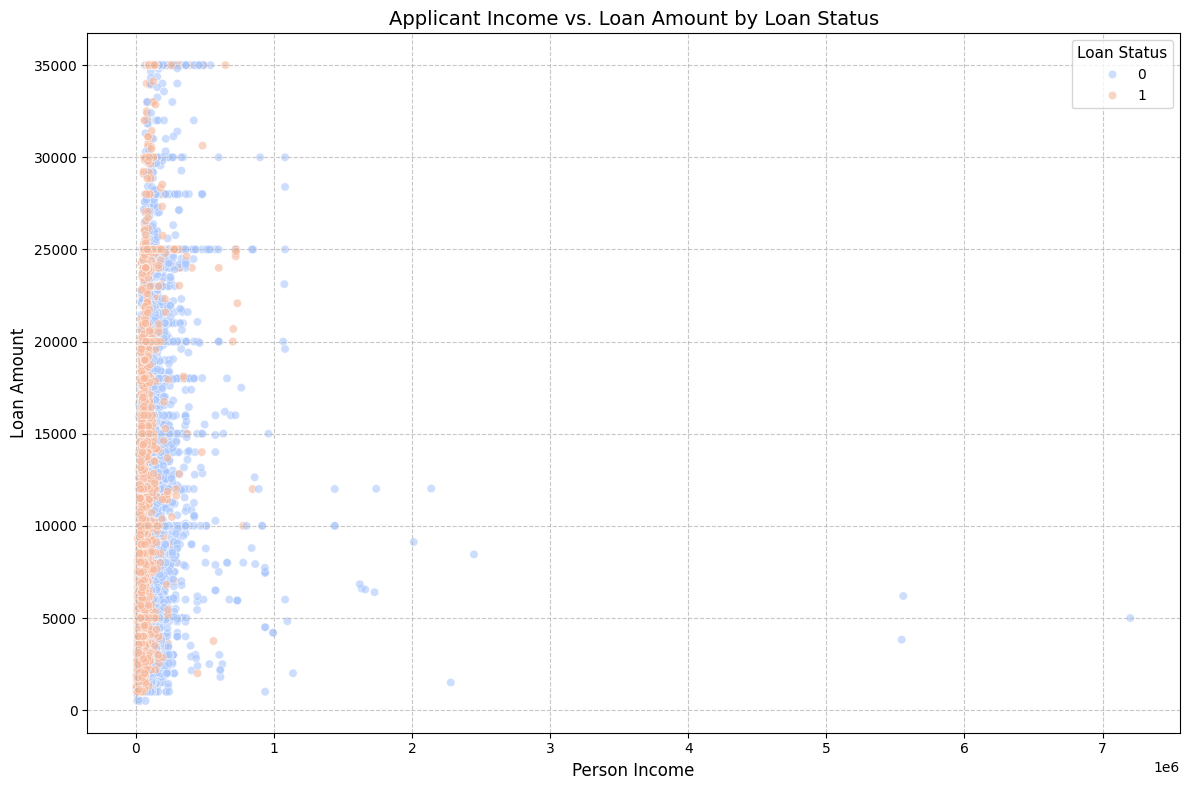

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loan Status Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=df_encoded, hue='loan_status', palette='viridis', legend=False)
plt.title('Distribution of Loan Status (0: Not Approved, 1: Approved)', fontsize=14)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Not Default', 'Default'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('loan_status_distribution_new.png')
plt.show()

# 2. Applicant Income Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['person_income'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Applicant Income', fontsize=14)
plt.xlabel('Person Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('applicant_income_distribution.png')
plt.show()

# 3. Applicant Income vs Loan Amount
plt.figure(figsize=(12, 8))
sns.scatterplot(x='person_income', y='loan_amnt', hue='loan_status', data=df_encoded, alpha=0.6, palette='coolwarm')
plt.title('Applicant Income vs. Loan Amount by Loan Status', fontsize=14)
plt.xlabel('Person Income', fontsize=12)
plt.ylabel('Loan Amount', fontsize=12)
plt.legend(title='Loan Status', title_fontsize='11', fontsize='10')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('income_vs_loan_amount.png')
plt.show()

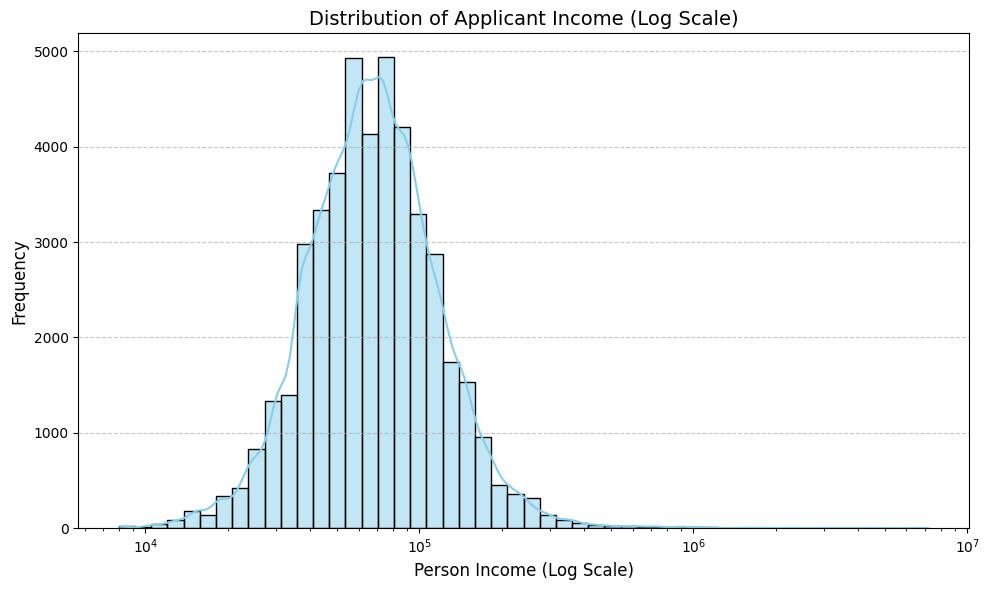

In [16]:
# 2. Applicant Income Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['person_income'], bins=50, kde=True, color='skyblue', log_scale=(True, False))
plt.title('Distribution of Applicant Income (Log Scale)', fontsize=14)
plt.xlabel('Person Income (Log Scale)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('applicant_income_distribution.png')
plt.show()

# **Phase 3: Model Development and Evaluation**

## **Model 1: Logistic Regression (Regression)**

In [17]:
# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' solver works well for small datasets and with L1/L2 regularization
log_reg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_log_reg = log_reg_model.predict(X_test_scaled)

# Calculate predicted probabilities for ROC AUC
y_pred_proba_log_reg = log_reg_model.predict_proba(X_test_scaled)[:, 1]



In [18]:
total_samples = X_train.shape[0] + X_test.shape[0]
train_percentage = (X_train.shape[0] / total_samples) * 100
test_percentage = (X_test.shape[0] / total_samples) * 100

print(f"Percentage of training data: {train_percentage:.2f}%")
print(f"Percentage of testing data: {test_percentage:.2f}%")

Percentage of training data: 70.00%
Percentage of testing data: 30.00%


## **Confusion Matrix Heatmap - Logistic Regression Model**

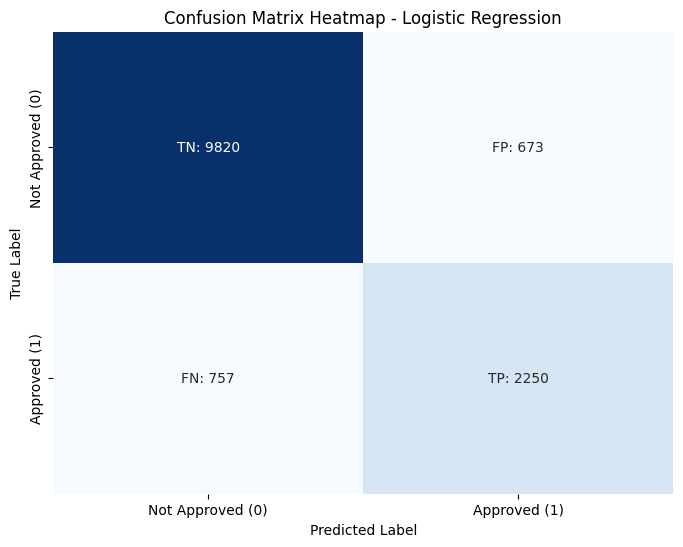

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Calculate the confusion matrix for the Logistic Regression model
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# Extract TN, FP, FN, TP
TN, FP, FN, TP = cm_log_reg.ravel()

# Create custom labels for annotation
annot_labels = np.array([['TN: ' + str(TN), 'FP: ' + str(FP)],
                         ['FN: ' + str(FN), 'TP: ' + str(TP)]])

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=annot_labels, fmt='s', cmap='Blues',
            xticklabels=['Not Approved (0)', 'Approved (1)'],
            yticklabels=['Not Approved (0)', 'Approved (1)'],
            cbar=False) # cbar=False to prevent issues with string annotations
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap - Logistic Regression')
plt.savefig('confusion_matrix_log_reg_heatmap.png')
plt.show()

In [20]:
from sklearn.metrics import roc_auc_score

# Evaluate the model
print("--- Logistic Regression Model Evaluation ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))
print(f"\nROC AUC Score: {roc_auc_score(y_test, y_pred_proba_log_reg):.4f}")

--- Logistic Regression Model Evaluation ---
Accuracy Score: 0.8941

Confusion Matrix:
[[9820  673]
 [ 757 2250]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     10493
           1       0.77      0.75      0.76      3007

    accuracy                           0.89     13500
   macro avg       0.85      0.84      0.85     13500
weighted avg       0.89      0.89      0.89     13500


ROC AUC Score: 0.9530


### **Logistic Regression: Train vs. Test Accuracy**

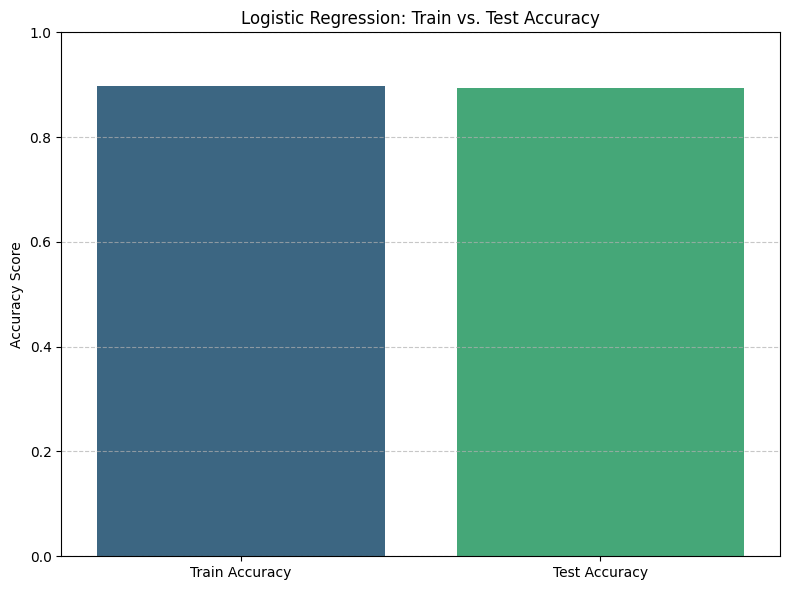

In [21]:
# Calculate training accuracy for Logistic Regression
y_train_pred_log_reg = log_reg_model.predict(X_train_scaled)
train_accuracy_log_reg = accuracy_score(y_train, y_train_pred_log_reg)

# Get testing accuracy for Logistic Regression
test_accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

# Create a DataFrame for plotting
accuracy_df = pd.DataFrame({
    'Metric': ['Train Accuracy', 'Test Accuracy'],
    'Score': [train_accuracy_log_reg, test_accuracy_log_reg]
})

# Plotting the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Metric', y='Score', hue='Metric', data=accuracy_df, palette='viridis', legend=False)
plt.ylim(0, 1) # Accuracy scores are between 0 and 1
plt.title('Logistic Regression: Train vs. Test Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('logistic_regression_accuracy_comparison.png')
plt.show()

## **ROC Curve Plot - Logistic Regression**

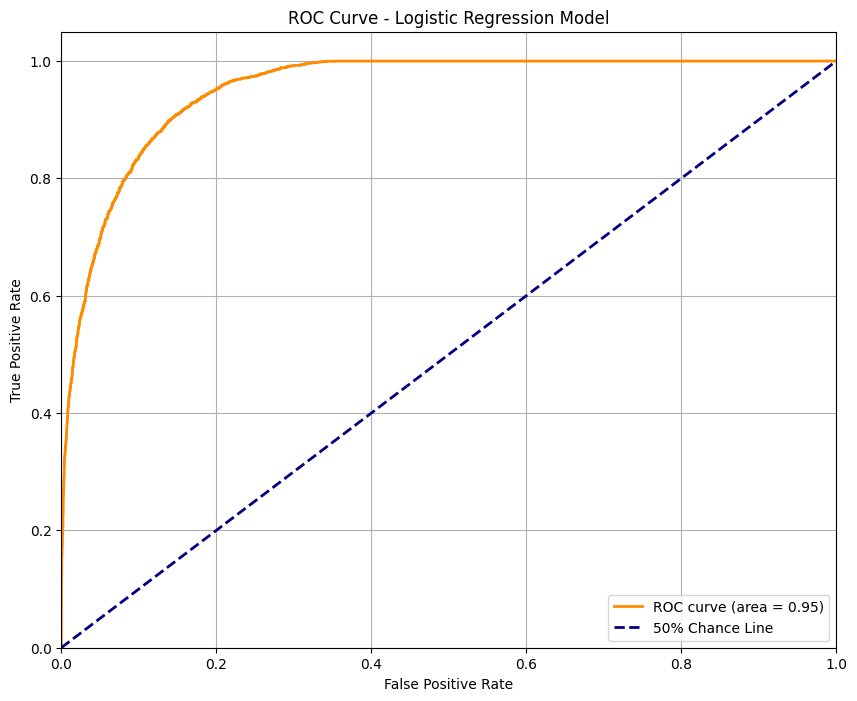

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (1) for Logistic Regression
y_pred_proba_log_reg = log_reg_model.predict_proba(X_test_scaled)[:, 1] # Use scaled data for log_reg_model

# Calculate False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_pred_proba_log_reg)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_log_reg, tpr_log_reg, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_log_reg:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='50% Chance Line')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('roc_curve_logistic_regression.png')
plt.show()

## **Model 2: Decision Tree**

In [23]:
# Initialize and train the Decision Tree Classifier model
dec_tree_model = DecisionTreeClassifier(random_state=42)
dec_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dec_tree = dec_tree_model.predict(X_test)

# Calculate predicted probabilities for ROC AUC
y_pred_proba_dec_tree = dec_tree_model.predict_proba(X_test)[:, 1]

## **Confusion Matrix Heatmap - Decision Tree Model**

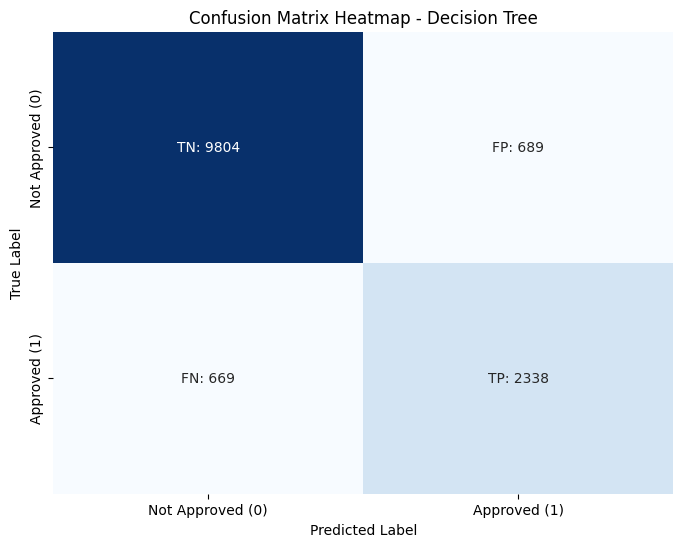

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Calculate the confusion matrix for the Decision Tree model
cm_dec_tree = confusion_matrix(y_test, y_pred_dec_tree)

# Extract TN, FP, FN, TP
TN, FP, FN, TP = cm_dec_tree.ravel()

# Create custom labels for annotation
annot_labels = np.array([['TN: ' + str(TN), 'FP: ' + str(FP)],
                         ['FN: ' + str(FN), 'TP: ' + str(TP)]])

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dec_tree, annot=annot_labels, fmt='s', cmap='Blues',
            xticklabels=['Not Approved (0)', 'Approved (1)'],
            yticklabels=['Not Approved (0)', 'Approved (1)'],
            cbar=False) # cbar=False to prevent issues with string annotations
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap - Decision Tree')
plt.savefig('confusion_matrix_dec_tree_heatmap.png')
plt.show()

In [25]:
# Evaluate the model
print("--- Decision Tree Classifier Model Evaluation ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_dec_tree):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dec_tree))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dec_tree))
print(f"\nROC AUC Score: {roc_auc_score(y_test, y_pred_proba_dec_tree):.4f}")

--- Decision Tree Classifier Model Evaluation ---
Accuracy Score: 0.8994

Confusion Matrix:
[[9804  689]
 [ 669 2338]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     10493
           1       0.77      0.78      0.77      3007

    accuracy                           0.90     13500
   macro avg       0.85      0.86      0.86     13500
weighted avg       0.90      0.90      0.90     13500


ROC AUC Score: 0.8559


### **Decision Tree: Train vs. Test Accuracy**

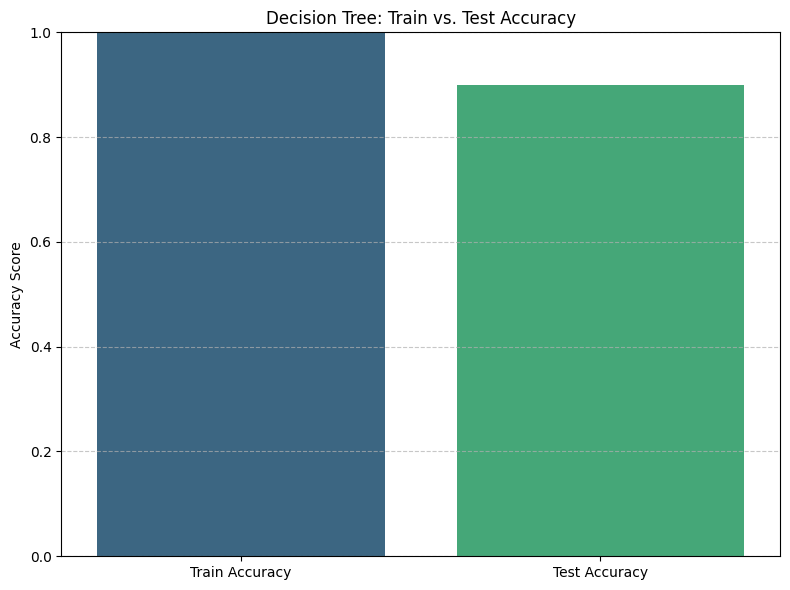

In [26]:
# Calculate training accuracy for Decision Tree
y_train_pred_dec_tree = dec_tree_model.predict(X_train)
train_accuracy_dec_tree = accuracy_score(y_train, y_train_pred_dec_tree)

# Get testing accuracy for Decision Tree
test_accuracy_dec_tree = accuracy_score(y_test, y_pred_dec_tree)

# Create a DataFrame for plotting
accuracy_df_dec_tree = pd.DataFrame({
    'Metric': ['Train Accuracy', 'Test Accuracy'],
    'Score': [train_accuracy_dec_tree, test_accuracy_dec_tree]
})

# Plotting the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Metric', y='Score', hue='Metric', data=accuracy_df_dec_tree, palette='viridis', legend=False)
plt.ylim(0, 1) # Accuracy scores are between 0 and 1
plt.title('Decision Tree: Train vs. Test Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('decision_tree_accuracy_comparison.png')
plt.show()

## **ROC Curve Plot - Decision Tree**

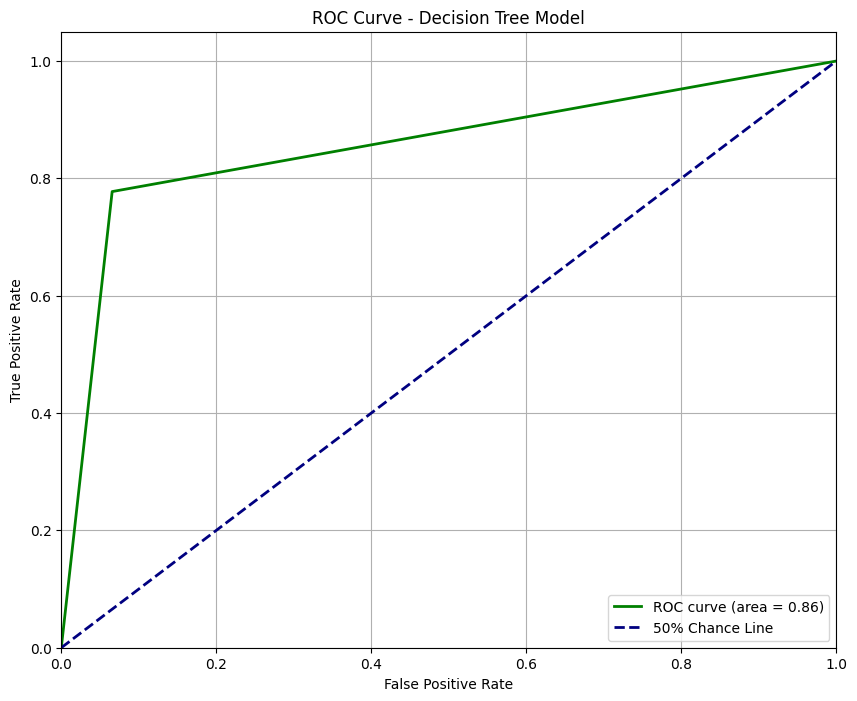

In [27]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (1) for Decision Tree
y_pred_proba_dec_tree = dec_tree_model.predict_proba(X_test)[:, 1] # Use unscaled data for dec_tree_model

# Calculate False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr_dec_tree, tpr_dec_tree, thresholds_dec_tree = roc_curve(y_test, y_pred_proba_dec_tree)
roc_auc_dec_tree = auc(fpr_dec_tree, tpr_dec_tree)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_dec_tree, tpr_dec_tree, color='green', lw=2, label=f'ROC curve (area = {roc_auc_dec_tree:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='50% Chance Line')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('roc_curve_decision_tree.png')
plt.show()

## **Model 3: Random Forest & Feature Importance (Key Model)**

In [28]:
# Initialize and train the Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate predicted probabilities for ROC AUC
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

## **Confusion Matrix Heatmap - Random Forest Model**

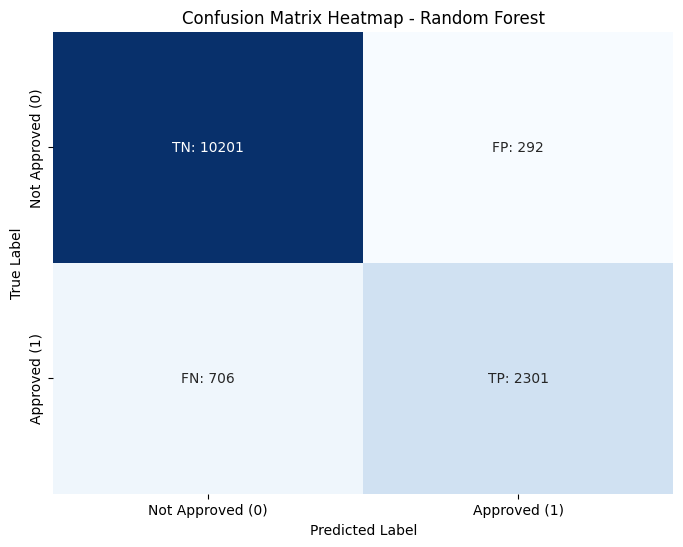

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for the Random Forest model
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Extract TN, FP, FN, TP
TN, FP, FN, TP = cm_rf.ravel()

# Create custom labels for annotation
annot_labels = np.array([['TN: ' + str(TN), 'FP: ' + str(FP)],
                         ['FN: ' + str(FN), 'TP: ' + str(TP)]])

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=annot_labels, fmt='s', cmap='Blues',
            xticklabels=['Not Approved (0)', 'Approved (1)'],
            yticklabels=['Not Approved (0)', 'Approved (1)'],
            cbar=False) # cbar=False to prevent issues with string annotations
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap - Random Forest')
plt.savefig('confusion_matrix_rf_heatmap.png')
plt.show() # Display the plot as requested in previous interactions

In [30]:
# Evaluate the model
print("--- Random Forest Classifier Model Evaluation ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print(f"\nROC AUC Score: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")

--- Random Forest Classifier Model Evaluation ---
Accuracy Score: 0.9261

Confusion Matrix:
[[10201   292]
 [  706  2301]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10493
           1       0.89      0.77      0.82      3007

    accuracy                           0.93     13500
   macro avg       0.91      0.87      0.89     13500
weighted avg       0.92      0.93      0.92     13500


ROC AUC Score: 0.9728


### **Random Forest: Train vs. Test Accuracy**

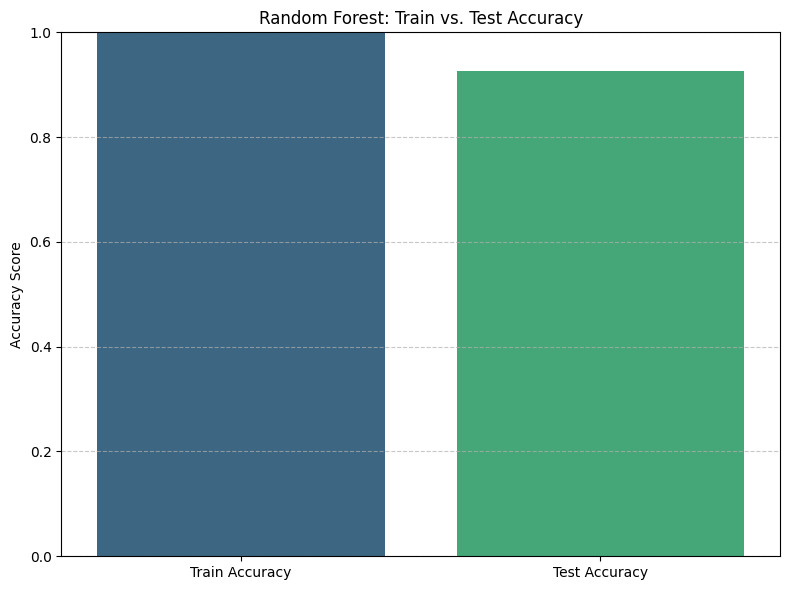

In [31]:
# Calculate training accuracy for Random Forest
y_train_pred_rf = rf_model.predict(X_train)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)

# Get testing accuracy for Random Forest
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Create a DataFrame for plotting
accuracy_df_rf = pd.DataFrame({
    'Metric': ['Train Accuracy', 'Test Accuracy'],
    'Score': [train_accuracy_rf, test_accuracy_rf]
})

# Plotting the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Metric', y='Score', hue='Metric', data=accuracy_df_rf, palette='viridis', legend=False)
plt.ylim(0, 1) # Accuracy scores are between 0 and 1
plt.title('Random Forest: Train vs. Test Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('random_forest_accuracy_comparison.png')
plt.show()

## **ROC Curve Plot - Random Forest**

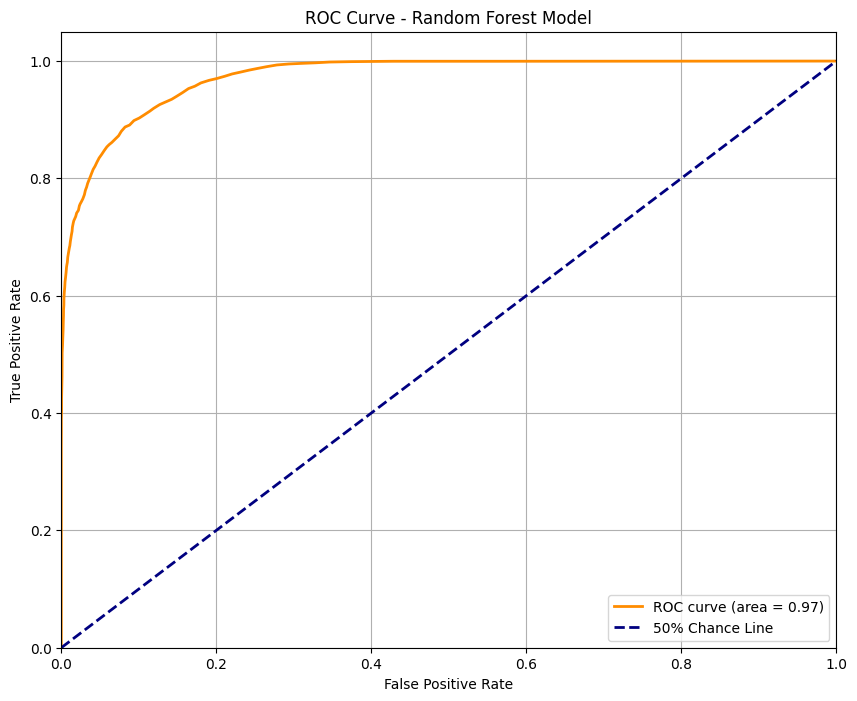

In [32]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (1)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Calculate False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='50% Chance Line')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('roc_curve_rf.png')
# plt.show() # As requested, not displaying the plot

## **Feature Importance**

/tmp/ipython-input-4200017125.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_features.values, y=top_10_features.index, palette='viridis')


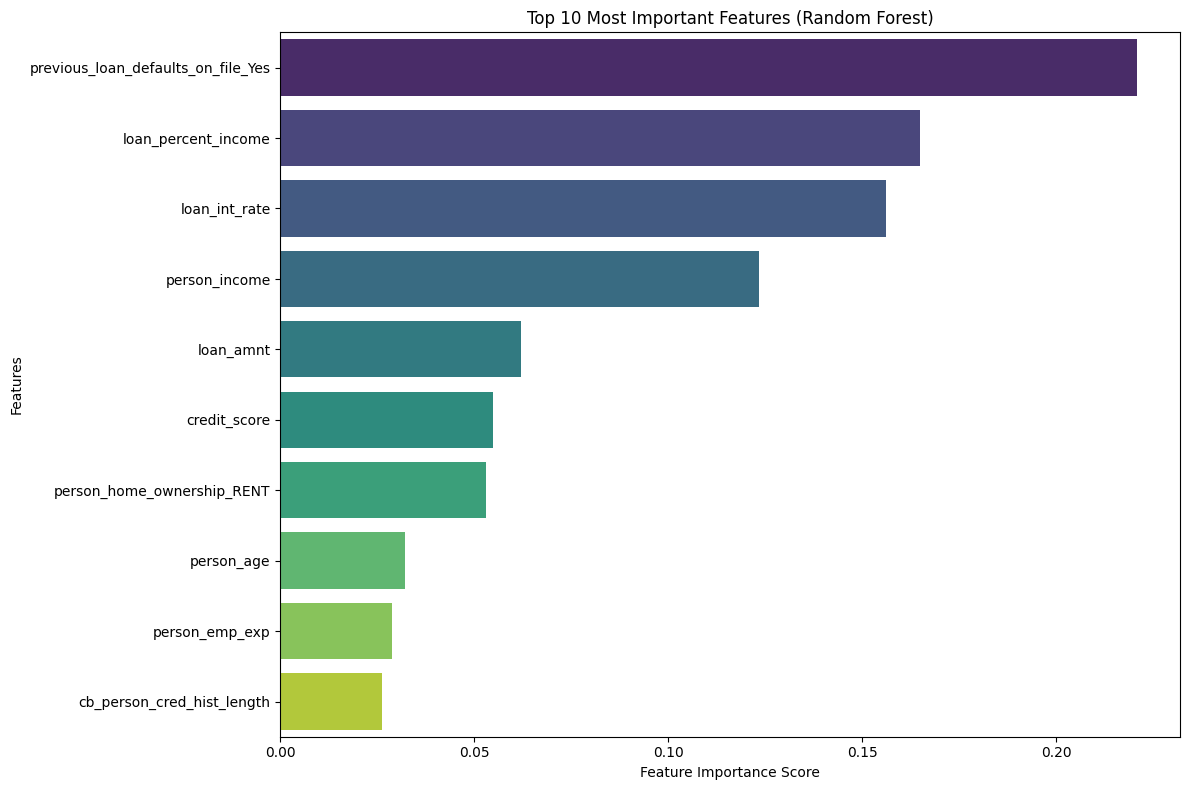

In [33]:
# Extract feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Get the top 10 most important features
top_10_features = feature_importances.nlargest(10)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_features.values, y=top_10_features.index, palette='viridis')
plt.title('Top 10 Most Important Features (Random Forest)')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show() # Display the figure